<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_5/les_5%20_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as scio
from sklearn.inspection import permutation_importance
from sklearn.datasets import make_classification

from sklearn import svm
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [100]:
# Створення простого датасету
np.random.seed(42)

# Перший клас: точки біля (1, 1)
class_1 = np.random.normal(loc=1, scale=0.3, size=(100, 2))

# Другий клас: точки біля (3, 3)
class_2 = np.random.normal(loc=3, scale=0.3, size=(100, 2))

# Об'єднуємо дані
X = np.vstack([class_1, class_2])
y = np.hstack([np.zeros(100), np.ones(100)])


In [101]:
plt.ion()
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [102]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0

    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)


In [103]:
def visualize_boundary(clf, X, x_min, x_max, y_min, y_max):
    h=.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors='r')

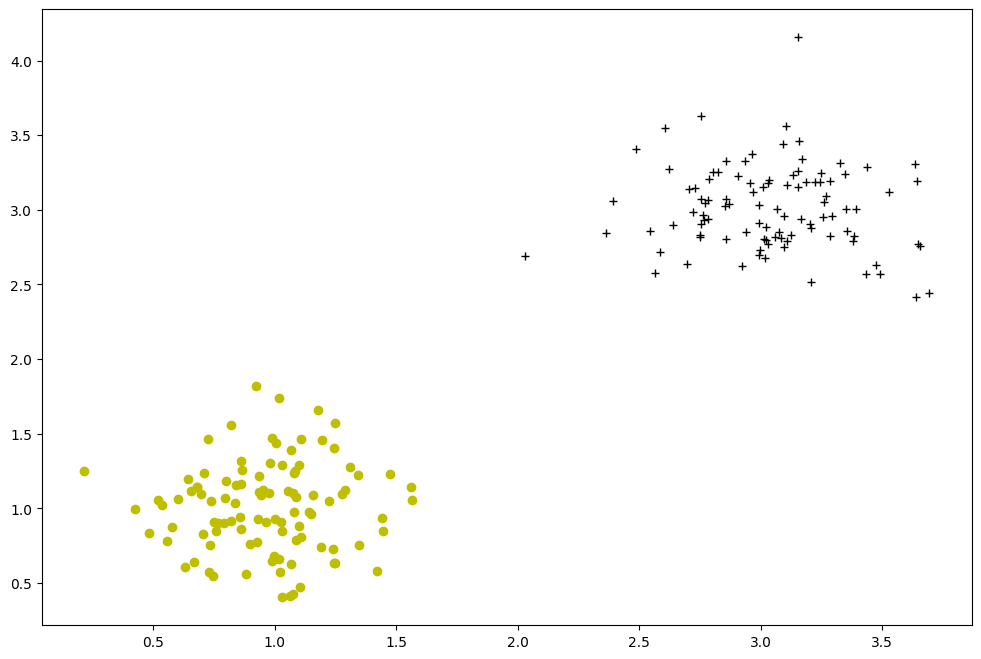

In [105]:
plt.figure(figsize=(12,8))
plot_data(X, y)

---
# SVM
---

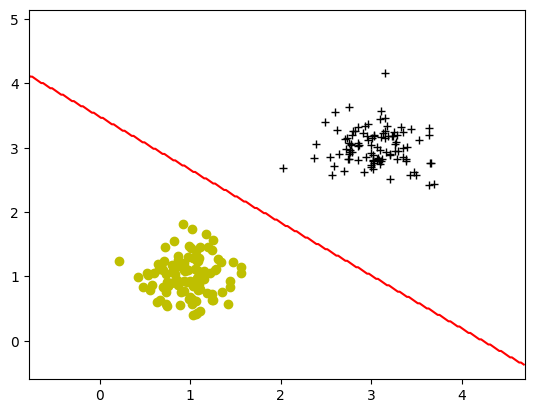

In [106]:
c = 1000
clf = svm.SVC(kernel='linear', C=c)
clf.fit(X, y)

plot_data(X, y)

# Визначаємо межі для побудови межі рішення
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

visualize_boundary(clf, X, x_min, x_max, y_min, y_max)

In [148]:
# Кількість точок
n_samples = 500

# Генерація точок класу 1 (всередині)
r = np.random.rand(n_samples // 2) * 5  # радіус
angle = np.random.rand(n_samples // 2) * 3 * np.pi  # кут
X1 = np.column_stack((r * np.cos(angle), r * np.sin(angle)))  # перетворення в декартові координати
y1 = np.ones(n_samples // 2)

# Генерація точок класу 0 (по контуру)
r_outer = 6 + np.random.randn(n_samples // 2) * 0.5  # радіус з шумом
angle_outer = np.random.rand(n_samples // 2) * 3 * np.pi  # кут
X0 = np.column_stack((r_outer * np.cos(angle_outer), r_outer * np.sin(angle_outer)))  # перетворення в декартові координати
y0 = np.zeros(n_samples // 2)

# Об'єднання даних
X = np.vstack((X1, X0))
y = np.hstack((y1, y0))


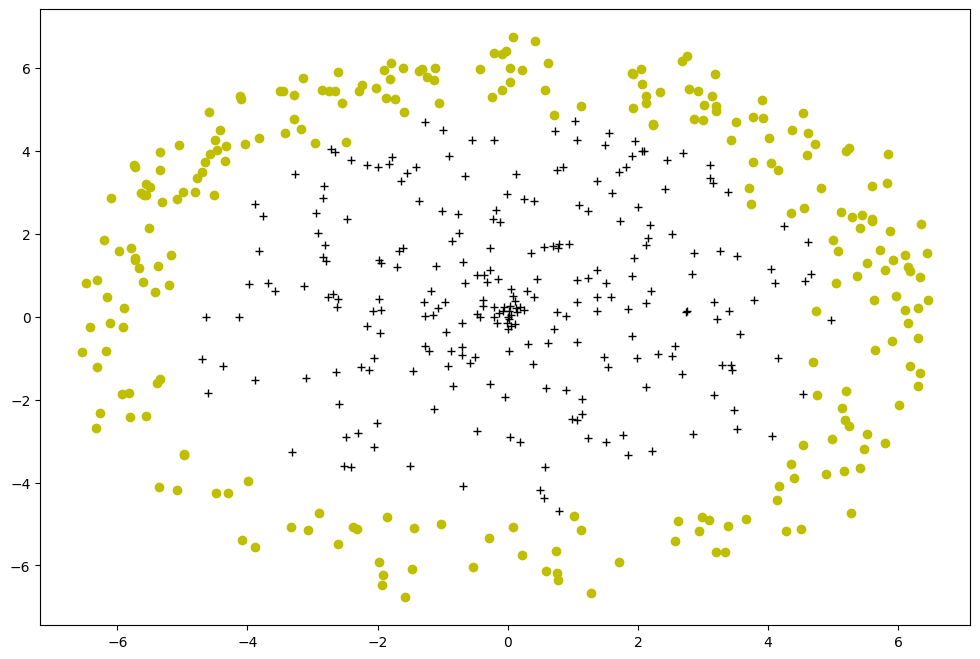

In [149]:
plt.figure(figsize=(12,8))
plot_data(X, y)

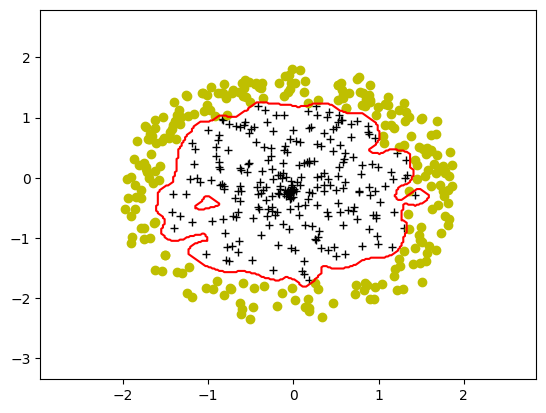

In [159]:
c = 1
sigma = 0.1

clf = svm.SVC(kernel='rbf', C=c, gamma=np.power(sigma, -2))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf.fit(X_scaled, y)

plot_data(X_scaled, y)

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

visualize_boundary(clf, X_scaled, x_min, x_max, y_min, y_max)
